# Predictions

This section of the notebook demonstrates how to apply the trained model to make predictions that can aid in decision-making processes. Here we will use our model to forecast student success rates based on new input data, illustrating potential impacts and educational interventions.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Load Model
from joblib import load
model = load('/Users/joshuabe/Downloads/Capstone 2 - Student Success Prediction/optimized_random_forest.joblib')

## Prepare Data

In [7]:
X_test_reduced = pd.read_csv('/Users/joshuabe/Downloads/Capstone 2 - Student Success Prediction/X_test_reduced.csv')
y_test = pd.read_csv('/Users/joshuabe/Downloads/Capstone 2 - Student Success Prediction/y_test.csv')

In [13]:
y_test_df = y_test.rename(columns={y_test.columns[0]: 'target'})

# Add y_test_df to X_test_reduced
combined_df = pd.concat([X_test_reduced, y_test_df], axis=1)

Let's run through scenarios that reflect realistic changes or interventions in key areas. We'll use a representative sample from our original dataset for this. 

### Scenario Planning

- **Impact of Poverty**: Show how changes in the child poverty rate could influence outcomes.
- **Attendance Initiatives**: Model the effect of improving attendance rates through different programs or policies.
- **Teacher Quality Improvements**: Demonstrate how improving teacher quality (combo of avg yrs of experience, % with a masters degree, and turnover rate) affects student outcomes. 

We'll create copies of the original data and manually adjust the values of the features according to the scenarios we want to showcase.
- For example, we'll increase the values of certain key features by a certain percentage and observe the change in predictions.

## Make Predictions

In [17]:
# Make predictions using the adjusted test data
predictions = model.predict(test_data.drop('target', axis=1))

# Display the adjusted test data and predictions
test_data['predicted_outcome'] = predictions

/Users/joshuabe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


## Visualize Predictions

We'll see how the different scenarios yield different predictions. 

- **Reduce Poverty**: We'll decrease child poverty rate by 10%. 
- **Increase Attendance**: We'll increase attendance by 5%. 
- **Improve Teacher Quality**: We'll increase teacher quality by 5%. 

/Users/joshuabe/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


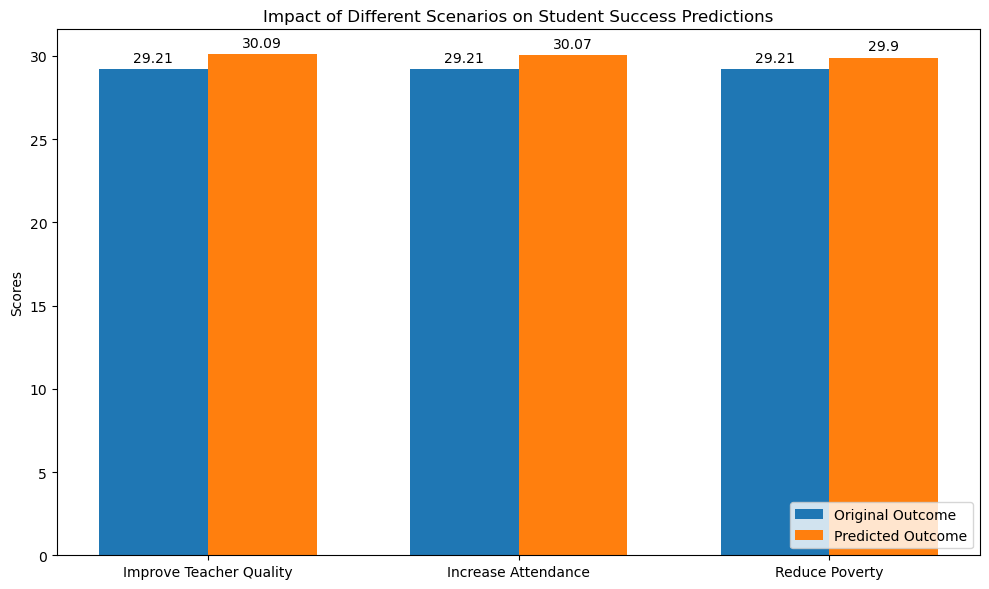

In [39]:
test_data_original = combined_df.sample(500, random_state=43)  # Sample some test data

# Create a scenario label and apply different modifications
scenarios = {
    'Reduce Poverty': test_data_original.copy(),
    'Increase Attendance': test_data_original.copy(),
    'Improve Teacher Quality': test_data_original.copy()
}

scenarios['Reduce Poverty']['child_poverty_rate'] *= 0.9
scenarios['Increase Attendance']['ADA'] *= 1.05
scenarios['Improve Teacher Quality']['teacher_quality_composite'] *= 1.05

# Assign scenario labels
for scenario, df in scenarios.items():
    df['scenario'] = scenario

# Combine into a single DataFrame
all_scenarios_df = pd.concat(scenarios.values())

# Make predictions
all_scenarios_df['predicted_outcome'] = model.predict(all_scenarios_df.drop(['target', 'scenario'], axis=1))

# Calculate means for original and predicted outcomes for visualization
mean_values = all_scenarios_df.groupby('scenario').agg({
    'target': 'mean',
    'predicted_outcome': 'mean'
}).reset_index()

# Plotting the results
fig, ax = plt.subplots(figsize=(10, 6))
x = np.arange(len(mean_values))  # the label locations
width = 0.35  # the width of the bars

rects1 = ax.bar(x - width/2, mean_values['target'], width, label='Original Outcome')
rects2 = ax.bar(x + width/2, mean_values['predicted_outcome'], width, label='Predicted Outcome')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Impact of Different Scenarios on Student Success Predictions')
ax.set_xticks(x)
ax.set_xticklabels(mean_values['scenario'])
ax.legend(loc='lower right')  # Move legend to the bottom right

# Function to attach a label above each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

# Save the plot as an image file
plt.savefig('/Users/joshuabe/Downloads/Capstone 2 - Student Success Prediction/success_prediction_scenarios.png', 
            dpi=300, bbox_inches='tight')

plt.show()

## Interpret Results

The results show each scenario of improvement offers nearly a 1% increase in the Above TSI Both Rate, which is the percent of graduating examinees meeting the college-ready graduates TSI benchmarks for the SAT or the ACT. 

- **Incremental Impact**: Even though the percentage increase in scores seems minimal, the impact can be significant when scaled up across large numbers of students. This suggests that even small improvements in the model's key features — teacher quality, attendance, and poverty reduction — can translate into substantial benefits for many students. 
- **Cumulative Effects**: The graph shows isolated effects of each scenario, but in practice, combining several positive changes might lead to compounding effects that are not merely additive but multiplicative. For example, improving teacher quality might have synergistic effects with increasing attendance, leading to greater overall improvements than either change alone.
- **Policy Recommendations**: These findings can be used to advocate for targeted interventions. For example, if improving teacher quality shows the most significant impact on test scores, programs for teacher training and retention could be prioritized.
- **Long-term Implications**: While the immediate impact is quantified as additional students achieving college readiness, the long-term effects could include higher graduation rates, better college enrollment rates, and ultimately, greater economic opportunities for these students. 